**Columns**

**label**
- '1' indicates that the email is classified as spam.
- '0' denotes that the email is legitimate (ham - no spam).

**text**

This column contains the actual content of the email messages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nltk


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_Project/data/combined_data.csv')
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [ ]:
# Check data types of columns
df.dtypes


,0
label,int64
text,object


In [ ]:
# Kiểm tra cột text
print("Kiểm tra cột text: ",df['text'].describe())
print("--------------------------")
# Xem xét một vài ví dụ về text
print(df['text'].head(5))
print("--------------------------")
# Kiểm tra các giá trị null trong cột text
print("Kiểm tra các giá trị null trong cột text: ")
print(df['text'].isnull().sum())
print("--------------------------")




Kiểm tra cột text:  count           83448
unique          83446
top       unsubscribe
freq                2
Name: text, dtype: object
--------------------------
0    ounce feather bowl hummingbird opec moment ala...
1    wulvob get your medircations online qnb ikud v...
2     computer connection from cnn com wednesday es...
3    university degree obtain a prosperous future m...
4    thanks for all your answers guys i know i shou...
Name: text, dtype: object
--------------------------
Kiểm tra các giá trị null trong cột text: 
0
--------------------------


In [ ]:
df.shape

(83448, 2)

## Kiểm tra giá trị thiếu (missing values)

In [ ]:
# Kiểm tra các giá trị null trong cột text và label
print(df['text'].isnull().sum())
print(df['label'].isnull().sum())
print(df.shape) #83448

0
0
(83448, 2)


## Kiểm tra các giá trị trùng lặp của cột text

In [ ]:
# Find and print duplicate rows based on the 'text' column
duplicate_rows = df[df.duplicated(subset=['text'], keep=False)]
print("Duplicate Rows based on 'text' column:")
print(duplicate_rows)

# Count the occurrences of each unique text
text_counts = df['text'].value_counts()

# Display texts that appear more than once
repeated_texts = text_counts[text_counts > 1]
print("\nTexts that appear more than once:")
repeated_texts


Duplicate Rows based on 'text' column:
       label         text
12425      0           hi
20516      0  unsubscribe
37213      1  unsubscribe
50633      1           hi

Texts that appear more than once:


,count
text,
unsubscribe,2
hi,2


In [ ]:
# Remove duplicate rows based on the 'text' column, keeping the first occurrence
df = df.drop_duplicates(subset=['text'], keep='first')

# Verify that duplicates have been removed
duplicate_rows_after_removal = df[df.duplicated(subset=['text'], keep=False)]
print("\nDuplicate Rows after removal:")
print(duplicate_rows_after_removal)

df.shape



Duplicate Rows after removal:
Empty DataFrame
Columns: [label, text]
Index: []


(83446, 2)

In [ ]:
# Find and print duplicate rows based on the 'text' column
duplicate_rows = df[df.duplicated(subset=['text'], keep=False)]
print("Duplicate Rows based on 'text' column:")
print(duplicate_rows)

# Count the occurrences of each unique text
text_counts = df['text'].value_counts()

# Display texts that appear more than once
repeated_texts = text_counts[text_counts > 1]
print("\nTexts that appear more than once:")
repeated_texts


Duplicate Rows based on 'text' column:
Empty DataFrame
Columns: [label, text]
Index: []

Texts that appear more than once:


,count
text,


## Kiểm tra cột label

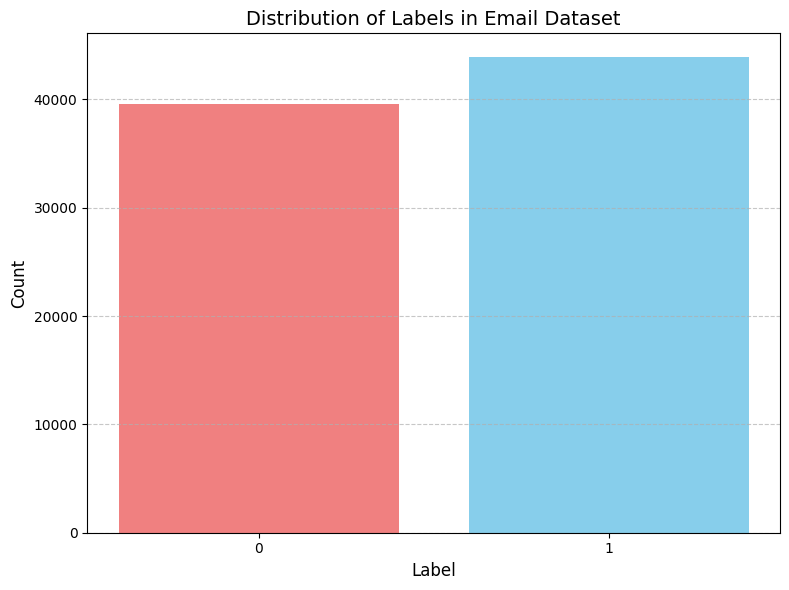

In [ ]:
import matplotlib.pyplot as plt
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a bar plot using matplotlib directly for more customization options
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=['skyblue', 'lightcoral'])  # Customize colors
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Labels in Email Dataset", fontsize=14)
plt.xticks(label_counts.index, fontsize=10)  # Set x-axis tick labels
plt.yticks(fontsize=10)  # Set y-axis tick labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid for better readability
plt.tight_layout()
plt.show()


In [ ]:

# Count the occurrences of each label
label_counts = df['label'].value_counts()

label_counts


,count
label,
1,43908
0,39538


In [ ]:
# Display the first 10 rows starting from index 5900
print(df.iloc[5600:5610])


      label                                               text
5600      1  see attach http www tiantul com as you wish mi...
5601      1  looking form recognized formats worry today pl...
5602      1  would you re - flnance if you knew you ' d sav...
5603      1  oorder quality pc programs on office administr...
5604      0  june escapenumber escapenumber salem massachus...
5605      1  hxpn is making great progress get on this trai...
5606      0  how about this usr local bin perl use strict u...
5607      1  latter action affect reading room argue usedto...
5608      1   oh yes there is a great difference but mr wes...
5609      1  dear customer we are happy to inform you about...


# Clean Data

1. Chuyển hết sang chữ thường
2. Loại bỏ ký tự đặc biệt
* Mục đích: Xóa các ký tự không cần thiết như dấu câu, ký tự đặc biệt (@, #, %, &,...).
3. Tokenization (Tách từ)
* Mục đích: Chuyển câu thành danh sách các từ riêng biệt.
* Ví dụ:
"hello my email is abc gmail com" → ['hello', 'my', 'email', 'is', 'abc', 'gmail', 'com']
4. Loại bỏ Stopwords
* Mục đích: Loại bỏ các từ không mang nhiều ý nghĩa trong phân loại như "the", "is", "and", "to",...
* Ví dụ:
['hello', 'my', 'email', 'is', 'abc', 'gmail', 'com'] → ['hello', 'email', 'abc', 'gmail', 'com']
5. Lemmatization (Thay thế Stemming)
* Mục đích: Chuyển từ về dạng gốc có nghĩa hơn so với Stemming.
* Ví dụ:
"running" → "run" "better" → "good"
6. Ghép từ lại thành câu  
* Sau khi xử lý xong, ta ghép danh sách từ lại thành văn bản

In [ ]:
# Tải các tài nguyên cần thiết từ nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

def preprocess_text(df):
    # Khởi tạo lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tạo danh sách stopwords
    stop_words = set(stopwords.words('english'))

    def clean_text(text):
        # 1. Chuyển hết sang chữ thường
        text = text.lower()

        # 2. Loại bỏ ký tự đặc biệt
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # 3. Tokenization (Tách từ)
        tokens = word_tokenize(text)

        # 4. Loại bỏ Stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # 5. Lemmatization (Thay thế Stemming)
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return ' '.join(lemmatized_tokens)

    # 6. Ghép từ lại thành câu
    df['clean_text'] = df['text'].apply(clean_text)
    return df


In [ ]:
# Apply preprocessing to the 'text' column
df = preprocess_text(df)

# Display the first few rows to see the changes
print(df['text'].head(5))

0    ounce feather bowl hummingbird opec moment ala...
1    wulvob get your medircations online qnb ikud v...
2     computer connection from cnn com wednesday es...
3    university degree obtain a prosperous future m...
4    thanks for all your answers guys i know i shou...
Name: text, dtype: object


<ipython-input-18-5569d2a0cd11>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
df.head(5)

,label,text,clean_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


## Chuyển đổi văn bản thành vector số và chuỗi số
1. **LSTM** cần dữ liệu dưới dạng chuỗi số (sequences)
Mô hình LSTM hoạt động tốt khi đầu vào là chuỗi số, tức là mỗi từ trong văn bản được ánh xạ thành một số nguyên.

Để làm được điều này, ta sử dụng Tokenizer để chuyển văn bản thành danh sách số nguyên (mỗi số tương ứng với một từ trong từ điển).

Do mỗi văn bản có độ dài khác nhau, ta dùng pad_sequences để đảm bảo tất cả văn bản có cùng độ dài.

Tóm lại:
👉 Không dùng TfidfVectorizer cho LSTM
👉 Dùng Tokenizer và pad_sequences để chuyển văn bản thành chuỗi số

2. **Naive Bayes & Random Forest** cần dữ liệu dạng ma trận đặc trưng (feature matrix)
Các mô hình truyền thống như Logistic Regression và Naive Bayes hoạt động tốt với dữ liệu dạng TF-IDF.

TF-IDF (Term Frequency - Inverse Document Frequency): Biểu diễn văn bản bằng cách gán trọng số cho từ dựa trên tần suất xuất hiện của nó trong toàn bộ tập dữ liệu.

Để tạo ra dạng dữ liệu này, ta dùng TfidfVectorizer của scikit-learn.

Tóm lại:
👉 Không dùng Tokenizer cho Naive Bayes & Random Forest
👉 Dùng TfidfVectorizer để tạo ma trận đặc trưng

Vì sao không dùng chung một phương pháp vector hóa?
LSTM xử lý dữ liệu theo chuỗi và cần duy trì thứ tự từ trong câu. TF-IDF không giữ được thứ tự từ, vì vậy không phù hợp với LSTM.

Logistic Regression và Naive Bayes chỉ quan tâm đến tần suất từ, không quan tâm đến thứ tự từ, nên TF-IDF là lựa chọn tốt hơn.

🔥 Kết luận:

LSTM: Dùng Tokenizer + pad_sequences

Naive Bayes & Random Forest: Dùng TF-IDF

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Thông số quan trọng
max_words = 5000  # Giữ lại 5000 từ quan trọng nhất
max_len = 100  # Độ dài tối đa của một văn bản

# Khởi tạo Tokenizer cho LSTM
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

# Chuyển văn bản thành chuỗi số cho LSTM
X_sequences = tokenizer.texts_to_sequences(df['clean_text'])
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post', truncating='post')

# Chuyển văn bản thành vector TF-IDF cho Logistic Regression & Naive Bayes
tfidf_vectorizer = TfidfVectorizer(max_features=max_words)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Nhãn
y = df['label'].values

# Phân chia dữ liệu

In [ ]:

# Chia tập dữ liệu
X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
print("Kích thước tập train:",X_train_lstm.shape )
print("Kích thước tập test:",X_test_lstm.shape )

Kích thước tập train: (66756, 100)
Kích thước tập test: (16690, 100)


In [ ]:
# Hàm tính toán các chỉ số
def print_metrics(model_name, y_true, y_pred, y_prob=None):
    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_true, y_pred):.4f}")

    if y_prob is not None:
        print(f"  AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")

    # Confusion Matrix
    print(f"  Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")


# Xây dựng mô hình


## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 128
lstm_units = 64

model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(lstm_units, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Huấn luyện mô hình
batch_size = 64
epochs = 10

history = model_lstm.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_lstm, y_test))


Epoch 1/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8361 - loss: 0.3958 - val_accuracy: 0.6788 - val_loss: 0.5927
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8787 - loss: 0.3317 - val_accuracy: 0.9528 - val_loss: 0.1616
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9572 - loss: 0.1484 - val_accuracy: 0.9680 - val_loss: 0.1146
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9691 - loss: 0.1092 - val_accuracy: 0.9735 - val_loss: 0.1002
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9796 - loss: 0.0798 - val_accuracy: 0.9792 - val_loss: 0.0704
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9840 - loss: 0.0611 - val_accuracy: 0.9812 - val_loss: 0.0613
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9894 - loss: 0.0400 - val_accuracy: 0.9824 - val_loss: 0.0599
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9910 - loss: 0

In [ ]:

# Dự đoán và đánh giá
y_pred_lstm_prob = model_lstm.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype("int32")

print_metrics("LSTM Model", y_test, y_pred_lstm.flatten(), y_pred_lstm_prob.flatten())


522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

LSTM Model:
  Accuracy: 0.9846
  Precision: 0.9848
  Recall: 0.9860
  F1-Score: 0.9854
  AUC-ROC: 0.9971
  Confusion Matrix:
[[7774  134]
 [ 123 8659]]



In [ ]:
from sklearn.metrics import classification_report

# Dự đoán xác suất (giá trị giữa 0 và 1)
y_prob_lstm = model_lstm.predict(X_test_lstm)

# Chuyển thành nhãn (0 hoặc 1)
y_pred_lstm = (y_prob_lstm > 0.5).astype("int32")

# In báo cáo đánh giá
print("Classification Report for LSTM Model:\n")
print(classification_report(y_test, y_pred_lstm))


522/522 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for LSTM Model:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7908
           1       0.98      0.99      0.99      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



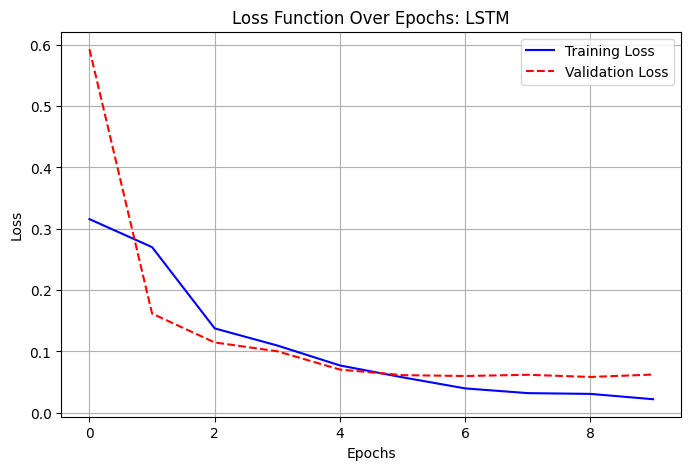

In [ ]:
import matplotlib.pyplot as plt

# Trích xuất dữ liệu từ history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ biểu đồ Loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss", color='blue', linestyle='solid')
plt.plot(val_loss, label="Validation Loss", color='red', linestyle='dashed')

# Định dạng biểu đồ
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Over Epochs: LSTM")
plt.legend()
plt.grid(True)
plt.show()


 Nhận xét về biểu đồ Loss của LSTM:
1️⃣ Giai đoạn đầu (Epochs 0-2):

Training Loss (Xanh) và Validation Loss (Đỏ) đều giảm mạnh → Mô hình đang học tốt.

Điều này cho thấy mô hình đang dần tối ưu hóa trọng số và cải thiện hiệu suất.

2️⃣ Giai đoạn giữa (Epochs 3-5):

Loss tiếp tục giảm nhưng chậm hơn, chứng tỏ mô hình đang dần hội tụ.

Validation Loss lúc này đã rất thấp, gần như bằng Training Loss.

3️⃣ Giai đoạn cuối (Epochs 6-9):

Training Loss tiếp tục giảm nhẹ → Mô hình vẫn đang học.

Validation Loss bắt đầu tăng nhẹ (từ epoch 6 trở đi) → Có dấu hiệu overfitting nhẹ.

Điều này có thể do mô hình đã học quá tốt trên tập huấn luyện nhưng kém tổng quát hóa hơn trên tập kiểm tra.

**CẢI THIỆN**
Giảm số epochs xuống 6-7 (tránh overfitting).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 128
lstm_units = 64

model_lstm_2 = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(lstm_units, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model_lstm_2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Thêm Early Stopping để dừng khi val_loss không giảm nữa
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Huấn luyện mô hình
epochs = 10
history_2 = model_lstm_2.fit(
    X_train_lstm, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_lstm, y_test),
    callbacks=[early_stopping]  # Dừng sớm nếu cần
)


Epoch 1/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8178 - loss: 0.4178 - val_accuracy: 0.9386 - val_loss: 0.1634
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9622 - loss: 0.1245 - val_accuracy: 0.9733 - val_loss: 0.0841
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9808 - loss: 0.0743 - val_accuracy: 0.9820 - val_loss: 0.0633
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9857 - loss: 0.0596 - val_accuracy: 0.9805 - val_loss: 0.0707
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9866 - loss: 0.0529 - val_accuracy: 0.9838 - val_loss: 0.0557
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9911 - loss: 0.0347 - val_accuracy: 0.9844 - val_loss: 0.0554
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9932 - loss: 0.0249 - val_accuracy: 0.9843 - val_loss: 0.0702
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9941 - 

In [ ]:
from sklearn.metrics import classification_report
# Dự đoán và đánh giá
y_pred_lstm_prob_2 = model_lstm_2.predict(X_test_lstm)
y_pred_lstm_2 = (y_pred_lstm_prob_2 > 0.5).astype("int32")

print_metrics("LSTM Model", y_test, y_pred_lstm_2.flatten(), y_pred_lstm_prob_2.flatten())


# Dự đoán xác suất (giá trị giữa 0 và 1)
y_prob_lstm_2 = model_lstm_2.predict(X_test_lstm)

# Chuyển thành nhãn (0 hoặc 1)
y_pred_lstm_2 = (y_prob_lstm_2 > 0.5).astype("int32")

# In báo cáo đánh giá
print("Classification Report for LSTM Model sau khi cải thiện:\n")
print(classification_report(y_test, y_pred_lstm_2))

522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

LSTM Model:
  Accuracy: 0.9844
  Precision: 0.9794
  Recall: 0.9912
  F1-Score: 0.9853
  AUC-ROC: 0.9971
  Confusion Matrix:
[[7725  183]
 [  77 8705]]

522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report for LSTM Model sau khi cải thiện:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7908
           1       0.98      0.99      0.99      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



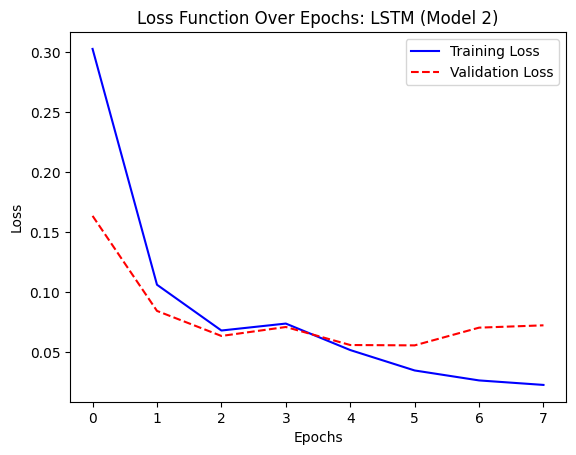

In [ ]:
import matplotlib.pyplot as plt

# Giả sử history_2 là kết quả training của model_lstm_2
plt.plot(history_2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_2.history['val_loss'], label='Validation Loss', linestyle='dashed', color='red')

# Thêm tiêu đề và nhãn
plt.title("Loss Function Over Epochs: LSTM (Model 2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Hiển thị biểu đồ
plt.show()


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Khởi tạo và huấn luyện mô hình Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred_nb = nb_model.predict(X_test_tfidf)

# Đánh giá mô hình
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
# Đánh giá Naive Bayes
print_metrics("Naive Bayes Model", y_test, y_pred_nb, nb_model.predict_proba(X_test_tfidf)[:, 1])


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7908
           1       0.97      0.96      0.97      8782

    accuracy                           0.96     16690
   macro avg       0.96      0.96      0.96     16690
weighted avg       0.96      0.96      0.96     16690


Naive Bayes Model:
  Accuracy: 0.9640
  Precision: 0.9728
  Recall: 0.9583
  F1-Score: 0.9655
  AUC-ROC: 0.9937
  Confusion Matrix:
[[7673  235]
 [ 366 8416]]



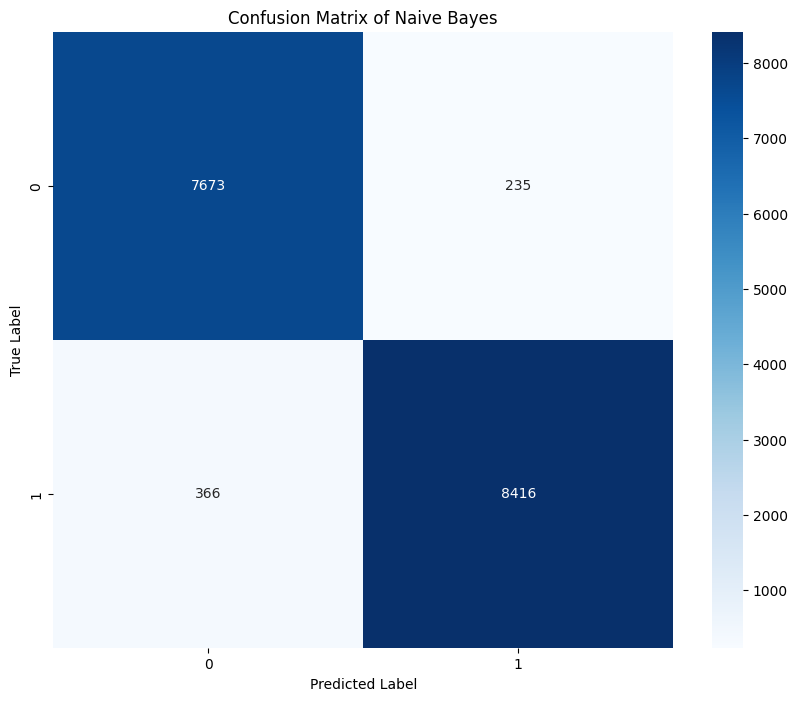

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix of Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test_tfidf)

# Đánh giá mô hình
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Đánh giá Random Forest
print_metrics("Random Forest Model", y_test, y_pred_rf, rf_model.predict_proba(X_test_tfidf)[:, 1])

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7908
           1       0.98      0.99      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



In [ ]:
# Đánh giá Random Forest
print_metrics("Random Forest Model", y_test, y_pred_rf, rf_model.predict_proba(X_test_tfidf)[:, 1])


Random Forest Model:
  Accuracy: 0.9842
  Precision: 0.9847
  Recall: 0.9852
  F1-Score: 0.9850
  AUC-ROC: 0.9980
  Confusion Matrix:
[[7774  134]
 [ 130 8652]]



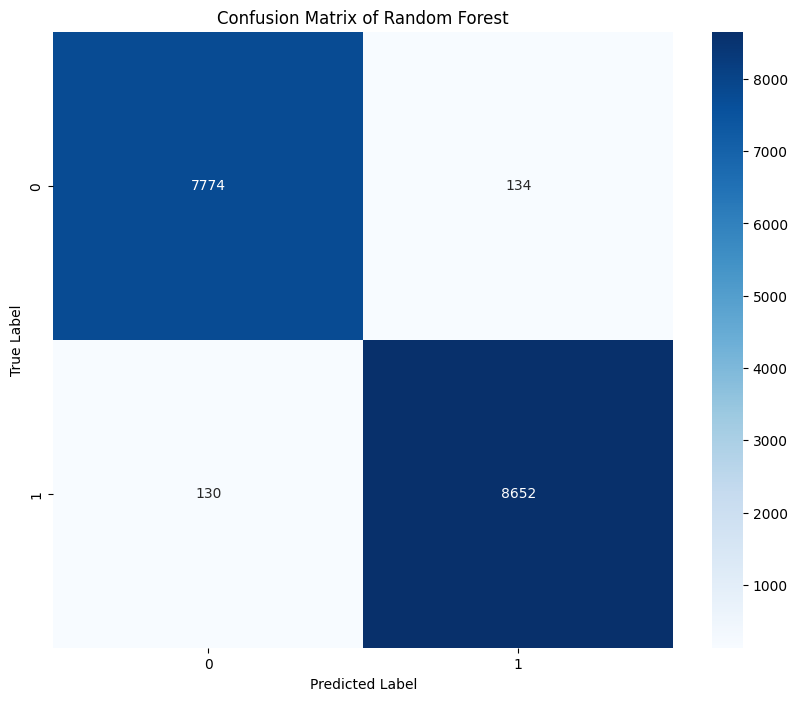

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# So sánh 3 mô hình

In [ ]:
import pandas as pd

# Lưu kết quả vào DataFrame
def evaluate_models(models, X_tests, y_test):
    results = []

    for name, (model, X_test) in models.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test).flatten()

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred.round()),
            "Precision": precision_score(y_test, y_pred.round()),
            "Recall": recall_score(y_test, y_pred.round()),
            "F1-Score": f1_score(y_test, y_pred.round()),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }
        results.append(metrics)

    df_results = pd.DataFrame(results)
    print(df_results)

# Tạo danh sách mô hình
models = {
    "Naive Bayes": (nb_model, X_test_tfidf),
    "Random Forest": (rf_model, X_test_tfidf),
    "LSTM": (model_lstm, X_test_lstm)
}

# Gọi hàm để hiển thị bảng kết quả
evaluate_models(models, {"Naive Bayes": X_test_tfidf, "Random Forest": X_test_tfidf, "LSTM": X_test_lstm}, y_test)


522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
522/522 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
           Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0    Naive Bayes  0.963990   0.972836  0.958324  0.965525  0.993704
1  Random Forest  0.984182   0.984748  0.985197  0.984973  0.998017
2           LSTM  0.984602   0.984761  0.985994  0.985377  0.997116


In [ ]:
import re
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


def predict_email(input_text):
    # Khởi tạo stop words & lemmatizer bên trong hàm
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Hàm tiền xử lý email
    def preprocess_text(text):
        text = text.lower()  # Chuyển về chữ thường
        text = re.sub(r'\W+', ' ', text)  # Loại bỏ ký tự đặc biệt
        words = word_tokenize(text)  # Tokenization
        words = [word for word in words if word not in stop_words]  # Loại bỏ stopwords
        words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
        return " ".join(words)

    clean_text = preprocess_text(input_text)

    # Chuyển đổi văn bản thành vector TF-IDF cho Naive Bayes & Random Forest
    input_vector_tfidf = tfidf_vectorizer.transform([clean_text])

    # Chuyển đổi văn bản thành chuỗi số cho LSTM
    input_sequence = tokenizer.texts_to_sequences([clean_text])
    input_padded = pad_sequences(input_sequence, maxlen=max_len, padding='post', truncating='post')

    # Dự đoán bằng Naive Bayes
    nb_pred = nb_model.predict(input_vector_tfidf)[0]
    nb_proba = nb_model.predict_proba(input_vector_tfidf)[0]

    # Dự đoán bằng Random Forest
    rf_pred = rf_model.predict(input_vector_tfidf)[0]
    rf_proba = rf_model.predict_proba(input_vector_tfidf)[0]

    # Dự đoán bằng LSTM
    lstm_proba = model_lstm.predict(input_padded)[0][0]
    lstm_pred = 1 if lstm_proba > 0.5 else 0

    # Kết quả dự đoán
    print(f"\nEmail: {input_text}")
    print("-" * 50)
    print(f"[Naive Bayes] Prediction: {'Spam' if nb_pred == 1 else 'No Spam'}")
    print(f"    Confidence: {nb_proba[1]:.4f} (Spam), {nb_proba[0]:.4f} (No Spam)")
    print(f"[Random Forest] Prediction: {'Spam' if rf_pred == 1 else 'No Spam'}")
    print(f"    Confidence: {rf_proba[1]:.4f} (Spam), {rf_proba[0]:.4f} (No Spam)")
    print(f"[LSTM] Prediction: {'Spam' if lstm_pred == 1 else 'No Spam'}")
    print(f"    Confidence: {lstm_proba:.4f} (Spam), {1 - lstm_proba:.4f} (No Spam)")



In [ ]:
# Email test
email1 = """Hello,

We look forward to connecting entrepreneurs with viable projects to invest in and those needing loans between the ranges of US$1 million and US$50 billion for a maximum period of 7–10 years.

Ras Al Khaimah Investment Authority has over $50 billion in private and corporate investment portfolios with an excess maximum return capital profit (EMRCP) of an average of 4.6% on each private investment and portfolio. Ras Al Khaimah Investment Authority wishes to re-invest this fund by putting it into the management of entrepreneurs, corporate entities, and viable professionals with good business ideas that can generate at least 10% ROI per annum over a maximum period of 10 years or more.

Ras Al Khaimah Investment Authority is currently offering loans/investment partnerships to interested applicants, financial services experts, and investment experts in most start-up companies.

Come with your ideas; let's build a solid wall in the financial sector and be able to make the sector viable for all. We give out loans to clients at a 2% interest rate per year. Apply today and be able to access your loan within a short time.

Note: Ras Al Khaimah Investment Authority also offers 1% commission to agents/brokers.

Yours Faithfully,
Hussain Abdullah
Email:  hussainabdullah@primasters.com
Financial Consultant On Investment
To: His Highness Sheikh Mohammad Saud Bin Saqr Al Qasimi
Ruler, Ras Al Khaimah City, United Arab Emirates
...
"""

email2 = "If you'd like to unsubscribe and stop receiving these emails click here."

# Chạy thử với email1
predict_email(email1)

# Chạy thử với email2
predict_email(email2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Email: Hello,

We look forward to connecting entrepreneurs with viable projects to invest in and those needing loans between the ranges of US$1 million and US$50 billion for a maximum period of 7–10 years.

Ras Al Khaimah Investment Authority has over $50 billion in private and corporate investment portfolios with an excess maximum return capital profit (EMRCP) of an average of 4.6% on each private investment and portfolio. Ras Al Khaimah Investment Authority wishes to re-invest this fund by putting it into the management of entrepreneurs, corporate entities, and viable professionals with good business ideas that can generate at least 10% ROI per annum over a maximum period of 10 years or more.

Ras Al Khaimah Investment Authority is currently offering loans/investment partnerships to interested applicants, financial services experts, and investment experts in most start-up companies.

Come with your ideas; let's build a solid wall in the financia

In [ ]:
email3= "Hi John, I hope you are doing well. Let's schedule a meeting for next week to discuss the project."
predict_email(email3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Email: Hi John, I hope you are doing well. Let's schedule a meeting for next week to discuss the project.
--------------------------------------------------
[Naive Bayes] Prediction: No Spam
    Confidence: 0.0217 (Spam), 0.9783 (No Spam)
[Random Forest] Prediction: No Spam
    Confidence: 0.1100 (Spam), 0.8900 (No Spam)
[LSTM] Prediction: No Spam
    Confidence: 0.0001 (Spam), 0.9999 (No Spam)


In [ ]:
import time
def evaluate_model(model, X_test, y_test, is_lstm=False):
    """Đánh giá mô hình: thời gian chạy & classification report"""
    start_time = time.time()

    if is_lstm:
        y_prob = model.predict(X_test)
        y_pred = (y_prob > 0.5).astype("int32").flatten()
    else:
        y_pred = model.predict(X_test)

    run_time = time.time() - start_time
    print(f"🔹 {model.__class__.__name__} - Time: {run_time:.4f} giây")

    # Chuyển đổi nhãn thành 'Spam' & 'No Spam'
    target_names = ["No Spam", "Spam"]
    print(classification_report(y_test, y_pred, target_names=target_names))

# Đánh giá LSTM
evaluate_model(model_lstm, X_test_lstm, y_test, is_lstm=True)

# Đánh giá Naive Bayes
evaluate_model(nb_model, X_test_tfidf, y_test)

# Đánh giá Random Forest
evaluate_model(rf_model, X_test_tfidf, y_test)

522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
🔹 Sequential - Time: 2.6525 giây
              precision    recall  f1-score   support

     No Spam       0.99      0.97      0.98      7908
        Spam       0.98      0.99      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

🔹 MultinomialNB - Time: 0.0074 giây
              precision    recall  f1-score   support

     No Spam       0.95      0.97      0.96      7908
        Spam       0.97      0.96      0.97      8782

    accuracy                           0.96     16690
   macro avg       0.96      0.96      0.96     16690
weighted avg       0.96      0.96      0.96     16690

🔹 RandomForestClassifier - Time: 0.8639 giây
              precision    recall  f1-score   support

     No Spam       0.98      0.98      0.98      7908
        Spam       0.98      0.99      0.98      8782

    accuracy               